In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 19

# Crypten

In [104]:
crypten_data = pd.read_csv('../chz-eab-nn-experiments/crypten_experiments/datasize_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))
crypten_data['total_time'] = crypten_data['epoch_duration'] + crypten_data['test_duration']

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['total_time'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration  \
0       334.103506      0          64       7500    0.1213     115.350260   
1       330.811416      1          64       7500    0.1621     115.805684   
2       330.879101      2          64       7500    0.2365     115.004239   
3       663.143592      0          64      15000    0.1244     117.321772   
4       668.208064      1          64      15000    0.1715     117.992892   
5       667.907569      2          64      15000    0.3042     116.648248   
6      1315.456388      0          64      30000    0.2173     114.857552   
7      1313.133419      1          64      30000    0.2820     116.150094   
8      1328.334851      2          64      30000    0.4606     114.715113   
9      2537.499688      0          64      60000    0.3578     115.763435   
10     2612.373227      1          64      60000    0.5357     128.444723   
11     2707.107256      2          64      60000    0.5746     115.908757   

# Plaintext Torch

In [105]:
torch_data = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/mnist/mnist_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

# print(torch_data)

torch_medians = torch_data.groupby('data_size')['total_duration'].median()
print(torch_medians)
torch_stdev = torch_data.groupby('data_size')['total_duration'].std()
print(torch_stdev)

data_size
7500      2.626104
15000     3.858952
30000     6.377122
60000    11.345573
Name: total_duration, dtype: float64
data_size
7500     0.022370
15000    0.030360
30000    0.044144
60000    0.045929
Name: total_duration, dtype: float64


# NVFlare

In [106]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_data = pd.read_csv(f'../chz-eab-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[np.float64(32.1772215), np.float64(35.0571565), np.float64(38.004146), np.float64(43.956458)]
[np.float64(0.3470507609049593), np.float64(1.0130758237605801), np.float64(0.3052995578776146), np.float64(0.28762160001194825)]


# Data Station

In [107]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
7500      7.317240
15000     8.502715
30000    10.905158
60000    15.664348
Name: total_duration, dtype: float64
data_size
7500     0.172851
15000    0.049639
30000    0.095084
60000    0.155105
Name: total_duration, dtype: float64


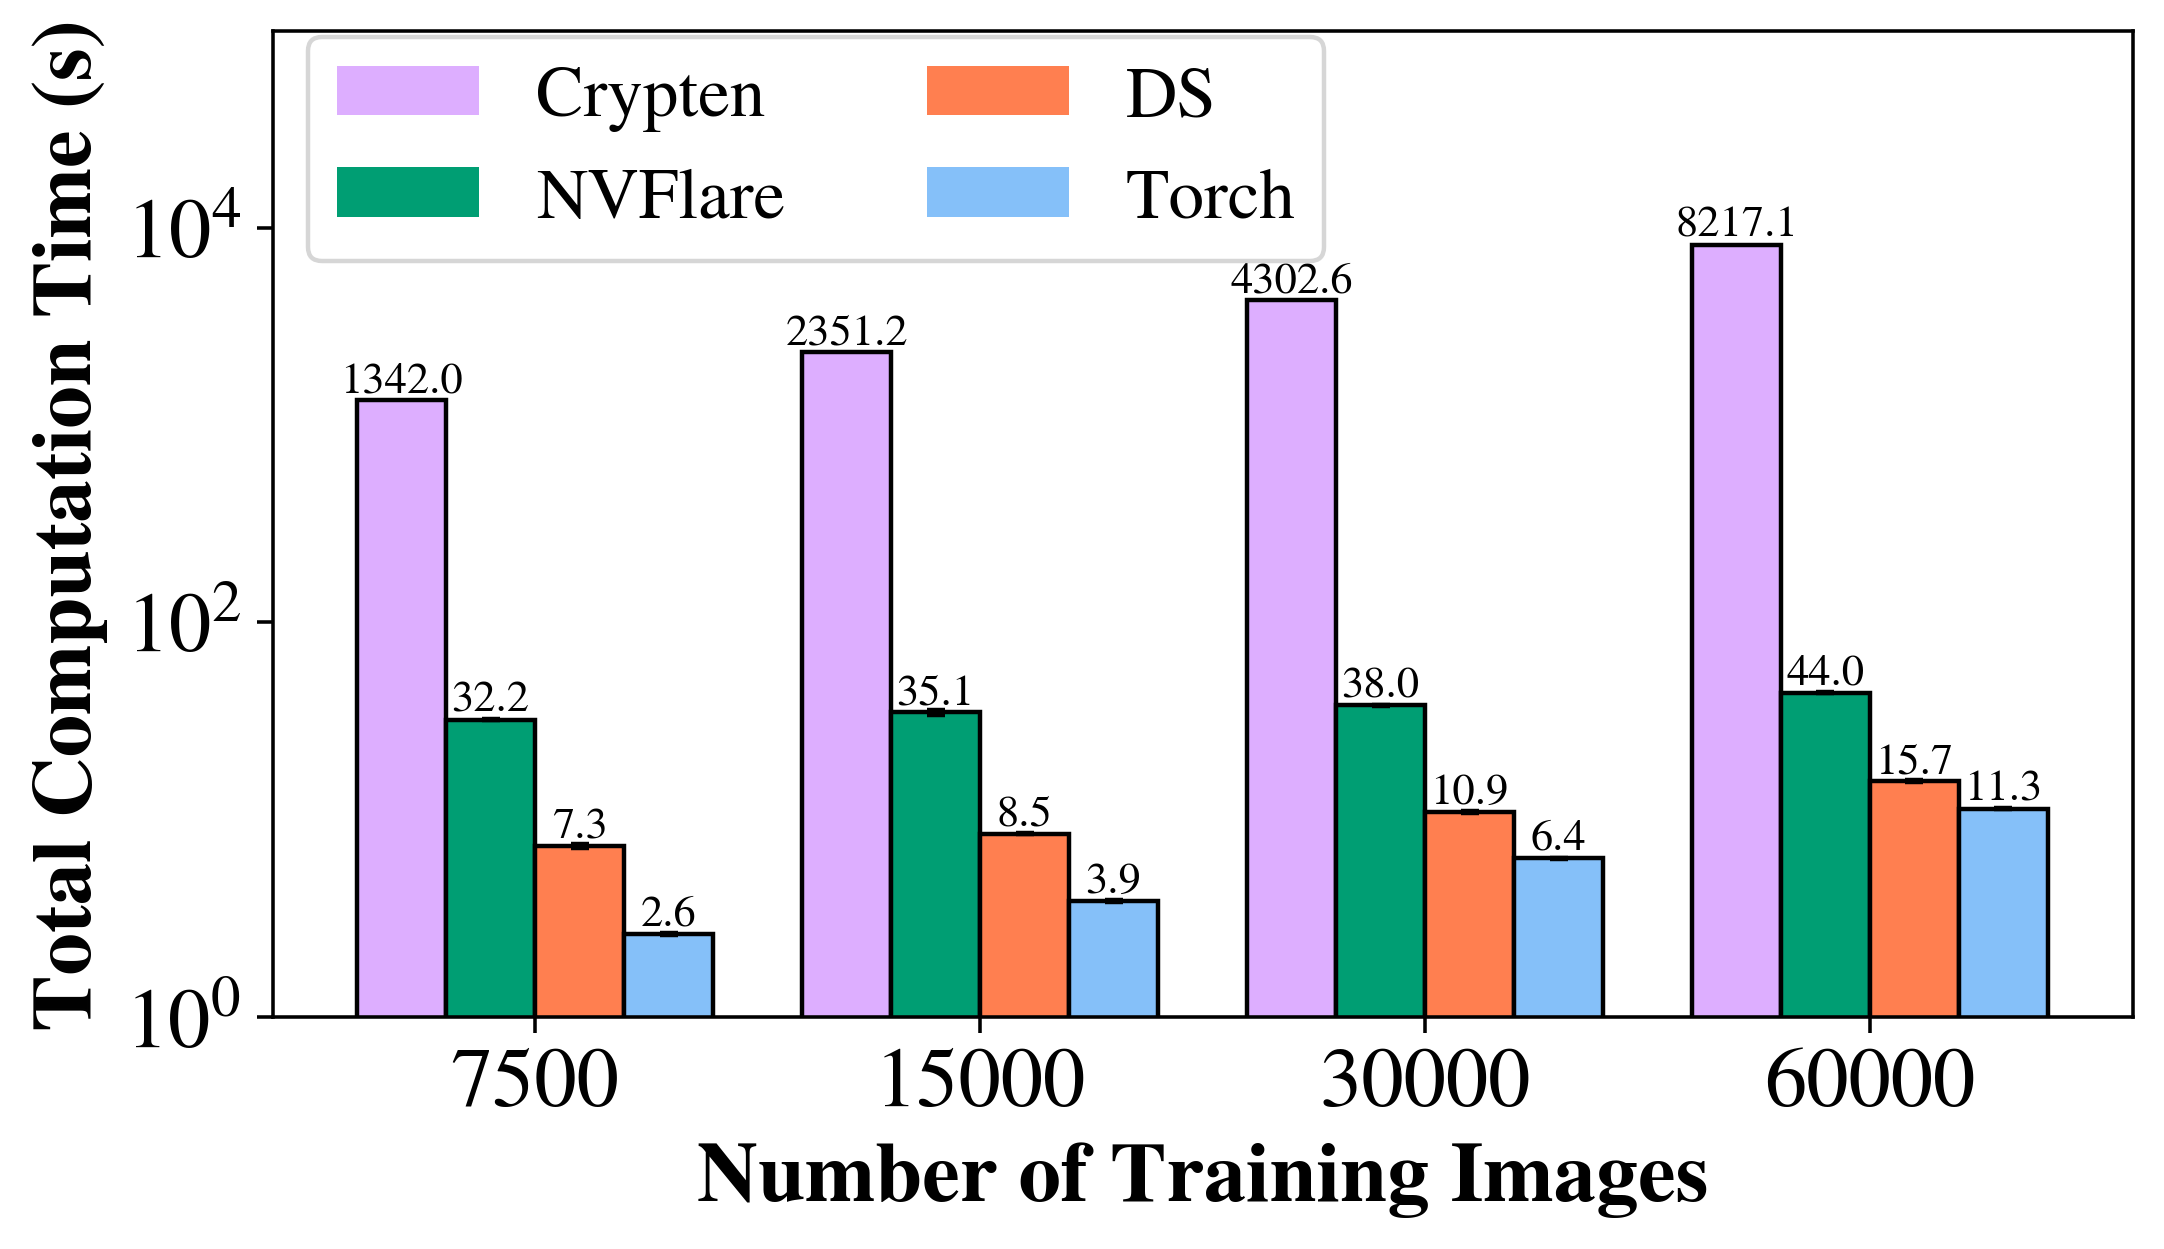

In [ ]:
bar_label_font_size = 10
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

# Crypten
crypten_bar = plt.bar(x=X_axis-1.5*width, width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=X_axis-1.5*width,width=width,height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
crypten_label = map(lambda n: '{0:.1f}'.format(n),mean_crypten)
plt.bar_label(crypten_bar, crypten_label, fontsize=bar_label_font_size)

# NVFlare
nvflare_bar = plt.bar(x=X_axis-0.5*width, width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=X_axis-0.5*width,width=width,height=nvflare_medians,yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
nvflare_label = map(lambda n: '{0:.1f}'.format(n),nvflare_medians)
plt.bar_label(nvflare_bar, nvflare_label, fontsize=bar_label_font_size)


# Data Station
ds_bar = plt.bar(x=X_axis+0.5*width, width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=X_axis+0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.1f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size)

# Torch
torch_bar = plt.bar(x=X_axis+1.5*width, width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=X_axis+1.5*width,width=width,height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
torch_label = map(lambda n: '{0:.1f}'.format(n),torch_medians)
plt.bar_label(torch_bar, torch_label, fontsize=bar_label_font_size)

plt.yscale('log')
plt.ylim(1, 150000)

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
plt.legend(ncols=2, loc='upper left',bbox_to_anchor=(0.0,1.03), fontsize=16)

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# Accuracy

## Data Station

In [109]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )

ds_acc = ds_acc[ds_acc['epoch'] == '2']
ds_acc['accuracy'] = ds_acc['accuracy'].astype('float')
# print(ds_acc)
# print(ds_acc.dtypes)


ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
ds_acc_stdevs = ds_acc.groupby('data_size')['accuracy'].std()

print(ds_acc_medians)
print(ds_acc_stdevs)

data_size
15000    0.3598
30000    0.5457
60000    0.6117
7500     0.2913
Name: accuracy, dtype: float64
data_size
15000    0.071803
30000    0.033314
60000    0.015116
7500     0.092943
Name: accuracy, dtype: float64


In [110]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )

ds_acc = ds_acc[ds_acc['epoch'] == '1']
ds_acc['accuracy'] = ds_acc['accuracy'].astype('float')
# print(ds_acc)
# print(ds_acc.dtypes)


ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
ds_acc_stdevs = ds_acc.groupby('data_size')['accuracy'].std()

print(ds_acc_medians)
print(ds_acc_stdevs)

data_size
15000    0.3221
30000    0.4542
60000    0.5846
7500     0.2275
Name: accuracy, dtype: float64
data_size
15000    0.078324
30000    0.053083
60000    0.041880
7500     0.073946
Name: accuracy, dtype: float64


## Plaintext

In [111]:
torch_acc = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 2]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)
torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

data_size
7500     0.2617
15000    0.3677
30000    0.5152
60000    0.6167
Name: accuracy, dtype: float64
data_size
7500     0.051987
15000    0.064702
30000    0.035256
60000    0.018779
Name: accuracy, dtype: float64


In [112]:
torch_acc = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 1]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)
torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

data_size
7500     0.2328
15000    0.2965
30000    0.4447
60000    0.5831
Name: accuracy, dtype: float64
data_size
7500     0.049523
15000    0.074485
30000    0.056989
60000    0.025669
Name: accuracy, dtype: float64


## NVFlare

In [113]:
nvflare_acc_medians = []
nvflare_acc_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_acc = pd.read_csv(f'../chz-eab-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/datasize_mnist_nn.csv',)
    nvflare_acc.columns = ['accuracy', 'epoch', 'batch_size', 'data_size', 'site']

    nvflare_acc = nvflare_acc[nvflare_acc['batch_size'] != 64.0]
    nvflare_acc = nvflare_acc[nvflare_acc['site'] == 'site-1']
    # print(nvflare_acc)
    
    # get every third element
    nvflare_acc = nvflare_acc.iloc[::3, :]
    # print(nvflare_acc)

    nvflare_acc_median = nvflare_acc['accuracy'].median()
    nvflare_acc_medians.append(nvflare_acc_median)
    
    nvflare_acc_stdev = nvflare_acc['accuracy'].std()
    nvflare_acc_stdevs.append(nvflare_acc_stdev)

print(nvflare_acc_medians)
print(nvflare_acc_stdevs)

[np.float64(0.1473), np.float64(0.25225), np.float64(0.42655), np.float64(0.5260499999999999)]
[np.float64(0.063832949520169), np.float64(0.05585363412030093), np.float64(0.06172896312825032), np.float64(0.03017825560086452)]


## Crypten

In [114]:
crypten_acc = crypten_data[crypten_data['epoch'] == 2]
crypten_acc_medians = crypten_acc.groupby('data_size')['accuracy'].median()
print(crypten_acc_medians)

data_size
7500     0.2365
15000    0.3042
30000    0.4606
60000    0.5746
Name: accuracy, dtype: float64


In [115]:
# Data Parsing for output
for idx, a in enumerate([7500, 15000, 30000, 60000]):
    crypten_acc_median = crypten_acc_medians[a]
    nvflare_acc_median = nvflare_acc_medians[idx]
    ds_acc_median = ds_acc_medians[str(a)]
    torch_acc_median = torch_acc_medians[a]
    
    nvflare_acc_stdev = nvflare_acc_stdevs[idx]
    ds_acc_stdev = ds_acc_stdevs[str(a)]
    torch_acc_stdev = torch_acc_stdevs[a]
    out = f"MNIST 2-Agent {a} & ${crypten_acc_median:.4f}$ & \makecell{{${nvflare_acc_median:.4f}$\\\\$\pm {nvflare_acc_stdev:.4f}$}} & \makecell{{${ds_acc_median:.4f}$\\\\$\pm {ds_acc_stdev:.4f}$}} & \makecell{{${torch_acc_median:.4f}$\\\\$\pm {torch_acc_stdev:.4f}$}} \\\\"
    print(out)
    print("\hline")

MNIST 2-Agent 7500 & $0.2365$ & \makecell{$0.1473$\\$\pm 0.0638$} & \makecell{$0.2275$\\$\pm 0.0739$} & \makecell{$0.2328$\\$\pm 0.0495$} \\
\hline
MNIST 2-Agent 15000 & $0.3042$ & \makecell{$0.2522$\\$\pm 0.0559$} & \makecell{$0.3221$\\$\pm 0.0783$} & \makecell{$0.2965$\\$\pm 0.0745$} \\
\hline
MNIST 2-Agent 30000 & $0.4606$ & \makecell{$0.4265$\\$\pm 0.0617$} & \makecell{$0.4542$\\$\pm 0.0531$} & \makecell{$0.4447$\\$\pm 0.0570$} \\
\hline
MNIST 2-Agent 60000 & $0.5746$ & \makecell{$0.5260$\\$\pm 0.0302$} & \makecell{$0.5846$\\$\pm 0.0419$} & \makecell{$0.5831$\\$\pm 0.0257$} \\
\hline


In [116]:
# Data Parsing for output, pivoted table